Goal

Where the Temp change has a vast variety of features that are both categorical and quantitive plus you can easily do some feature engineering converting Celsius to Fahrenheit. and could correlate the different elements to temperature increase and decrease.  And, having all the years available, you could plot the temps over time just to get some charts in there. 

Compare Highest 3 to the Lowest 3 



In [ ]:
# I first list off any libraries I may use at some point during the project. 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import numpy as np

from matplotlib.dates import MonthLocator, DateFormatter

In [ ]:
# I decided to import them from Drive to keep things organized. 
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
# Next, I must import all of the respective CSVs I need.
AEP = pd.read_csv('/content/drive/My Drive/Colab Notebooks/PP1CSV/AEP_hourly.csv')
PJMW = pd.read_csv('/content/drive/My Drive/Colab Notebooks/PP1CSV/PJMW_hourly.csv')

Hypothesis

Is there a correlation between the time of year and the amount of energy used?

In [ ]:
#I start by printing out one of the CSVs. I know that all of the CSVs 
#have the same format of the DataTime in hours and the Company Name along with the MegaWatt
#indicator. 

AEP

,Datetime,AEP_MW
0,2004-12-31 01:00:00,13478.0
1,2004-12-31 02:00:00,12865.0
2,2004-12-31 03:00:00,12577.0
3,2004-12-31 04:00:00,12517.0
4,2004-12-31 05:00:00,12670.0
...,...,...
121268,2018-01-01 20:00:00,21089.0
121269,2018-01-01 21:00:00,20999.0
121270,2018-01-01 22:00:00,20820.0
121271,2018-01-01 23:00:00,20415.0


In [ ]:
AEP.dtypes

Datetime     object
AEP_MW      float64
dtype: object

In [ ]:
AEP['Datetime'] = pd.to_datetime(AEP['Datetime'])

AEP = AEP.rename(columns={
    'Datetime' : 'Time_of_Year'
    })

In [ ]:
def get_month(input):
    return input.month
AEP['Month'] = AEP['Time_of_Year'].apply(get_month)

In [ ]:
def get_day(input):
    return input.day
AEP['Day'] = AEP['Time_of_Year'].apply(get_day)

In [ ]:
def get_year(input):
    return input.year
AEP['Year'] = AEP['Time_of_Year'].apply(get_year)

In [ ]:
def get_hour(input):
    return input.hour
AEP['Hour'] = AEP['Time_of_Year'].apply(get_hour)

In [ ]:
#Sorting our values per year
AEP.loc[AEP['Year'] == 2015]

,Time_of_Year,AEP_MW,Month,Day,Year,Hour
81098,2015-01-01 00:00:00,16375.0,1,1,2015,0
89834,2015-12-31 01:00:00,12415.0,12,31,2015,1
89835,2015-12-31 02:00:00,12087.0,12,31,2015,2
89836,2015-12-31 03:00:00,12010.0,12,31,2015,3
89837,2015-12-31 04:00:00,11972.0,12,31,2015,4
...,...,...,...,...,...,...
98589,2015-01-01 20:00:00,16586.0,1,1,2015,20
98590,2015-01-01 21:00:00,16312.0,1,1,2015,21
98591,2015-01-01 22:00:00,15859.0,1,1,2015,22
98592,2015-01-01 23:00:00,15195.0,1,1,2015,23


In [ ]:
#Sorting our values per day not including a specific year
AEP.loc[(AEP['Day'] == 13) & (AEP['Year'] != 2004)]

,Time_of_Year,AEP_MW,Month,Day,Year,Hour
2639,2005-12-13 01:00:00,17329.0,12,13,2005,1
2640,2005-12-13 02:00:00,16908.0,12,13,2005,2
2641,2005-12-13 03:00:00,16812.0,12,13,2005,3
2642,2005-12-13 04:00:00,16829.0,12,13,2005,4
2643,2005-12-13 05:00:00,17319.0,12,13,2005,5
...,...,...,...,...,...,...
120980,2018-01-13 20:00:00,19295.0,1,13,2018,20
120981,2018-01-13 21:00:00,19272.0,1,13,2018,21
120982,2018-01-13 22:00:00,18912.0,1,13,2018,22
120983,2018-01-13 23:00:00,18600.0,1,13,2018,23


In [ ]:
Y2007 = AEP.loc[AEP['Year'] == 2007]
Y2007Mean = round(Y2007['AEP_MW'].mean(),0)

In [ ]:
PJMW.head()

,Datetime,PJMW_MW
0,2002-12-31 01:00:00,5077.0
1,2002-12-31 02:00:00,4939.0
2,2002-12-31 03:00:00,4885.0
3,2002-12-31 04:00:00,4857.0
4,2002-12-31 05:00:00,4930.0


In [ ]:
PJMW['PJMW_MW'].mean()

5602.375089032583

In [ ]:
st.stats.ttest_1samp(PJMW['PJMW_MW'], 15278)

Ttest_1sampResult(statistic=-3739.5002300785522, pvalue=0.0)

In [ ]:
Y2018 = AEP.loc[AEP['Year'] == 2018]
twosamp1 = Y2018['AEP_MW']


In [ ]:
Y2007 = AEP.loc[AEP['Year'] == 2007]
twosamp2 = Y2007['AEP_MW']

In [ ]:
import scipy.stats as st

st.ttest_ind(twosamp1, twosamp2)

Ttest_indResult(statistic=-29.49644505320302, pvalue=1.5782832721175437e-185)

In [ ]:
Y2015 = AEP.loc[AEP['Year'] == 2015]

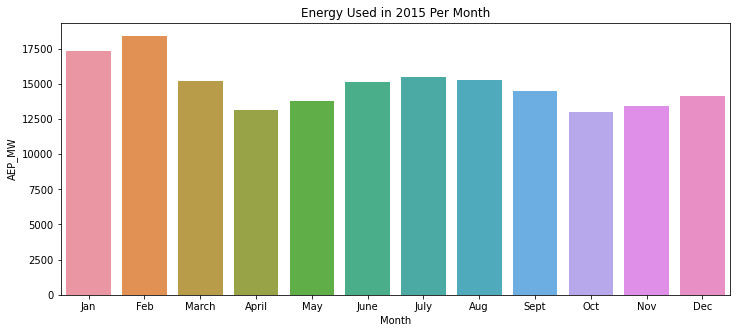

In [ ]:
agg_2015= Y2015.groupby('Month')['AEP_MW'].mean().reset_index()
fix,ax=plt.subplots(figsize=(12,5))
a = sns.barplot(data=agg_2015, x='Month', y='AEP_MW')
a.set_xticklabels(['Jan','Feb','March','April','May','June','July','Aug','Sept','Oct','Nov','Dec'])
plt.title('Energy Used in 2015 Per Month')
plt.show()

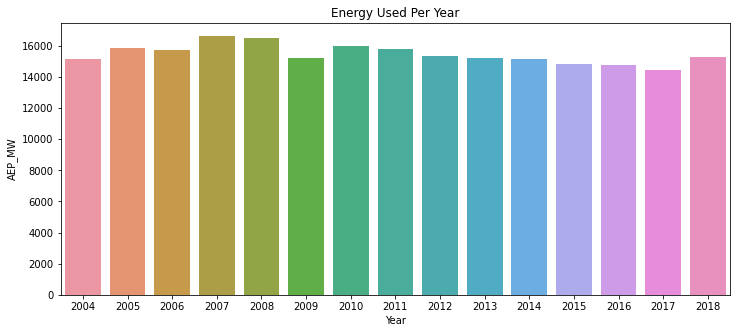

In [ ]:
agg_overall = AEP.groupby('Year')['AEP_MW'].mean().reset_index()
fix,ax=plt.subplots(figsize=(12,5))
a = sns.barplot(data=agg_overall, x='Year', y='AEP_MW')
plt.title('Energy Used Per Year')
plt.show()

In [ ]:
frames = [AEP, PJMW]

merged = pd.concat(frames, axis=1)

merged

,Time_of_Year,AEP_MW,Month,Day,Year,Hour,Datetime,PJMW_MW
0,2004-12-31 01:00:00,13478.0,12.0,31.0,2004.0,1.0,2002-12-31 01:00:00,5077.0
1,2004-12-31 02:00:00,12865.0,12.0,31.0,2004.0,2.0,2002-12-31 02:00:00,4939.0
2,2004-12-31 03:00:00,12577.0,12.0,31.0,2004.0,3.0,2002-12-31 03:00:00,4885.0
3,2004-12-31 04:00:00,12517.0,12.0,31.0,2004.0,4.0,2002-12-31 04:00:00,4857.0
4,2004-12-31 05:00:00,12670.0,12.0,31.0,2004.0,5.0,2002-12-31 05:00:00,4930.0
...,...,...,...,...,...,...,...,...
143201,NaT,NaN,NaN,NaN,NaN,NaN,2018-01-01 20:00:00,8401.0
143202,NaT,NaN,NaN,NaN,NaN,NaN,2018-01-01 21:00:00,8373.0
143203,NaT,NaN,NaN,NaN,NaN,NaN,2018-01-01 22:00:00,8238.0
143204,NaT,NaN,NaN,NaN,NaN,NaN,2018-01-01 23:00:00,7958.0


In [ ]:
energy = [AEP['AEP_MW'], PJMW['PJMW_MW']]
pd.concat(energy, axis=1)

,AEP_MW,PJMW_MW
0,13478.0,5077.0
1,12865.0,4939.0
2,12577.0,4885.0
3,12517.0,4857.0
4,12670.0,4930.0
...,...,...
143201,NaN,8401.0
143202,NaN,8373.0
143203,NaN,8238.0
143204,NaN,7958.0


In [ ]:
from statsmodels.formula.api import ols
PJMW['PJMW_MW'].dropna(inplace=True)

model3 = ols('AEP_MW ~ PJMW_MW', data=merged).fit()

model3.params

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Intercept    10108.794822
PJMW_MW          0.961884
dtype: float64

In [ ]:
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:                 AEP_MW   R-squared:                       0.131
Model:                            OLS   Adj. R-squared:                  0.131
Method:                 Least Squares   F-statistic:                 1.825e+04
Date:                Sat, 16 Oct 2021   Prob (F-statistic):               0.00
Time:                        20:59:57   Log-Likelihood:            -1.1168e+06
No. Observations:              121273   AIC:                         2.234e+06
Df Residuals:                  121271   BIC:                         2.234e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.011e+04     40.501    249.592      0.0

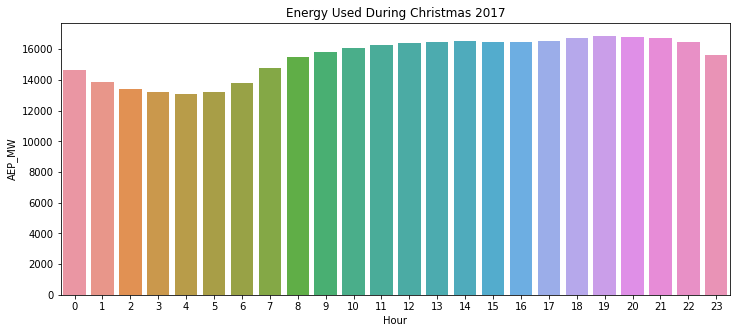

In [ ]:
Dec252017 = AEP.loc[(AEP['Day'] == 25) & (AEP['Year'] == 2017) & (AEP['Month'] == 12)]

D252017_agg = AEP.groupby('Hour')['AEP_MW'].mean().reset_index()
fix,ax=plt.subplots(figsize=(12,5))
d = sns.barplot(data=D252017_agg, x='Hour', y='AEP_MW')
plt.title('Energy Used During Christmas 2017')
plt.show()

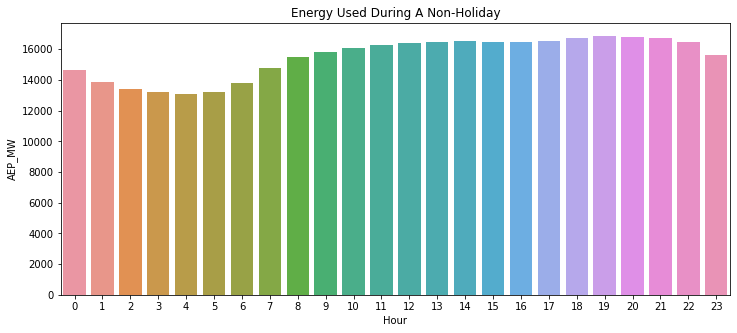

In [ ]:
May112017 = AEP.loc[(AEP['Day'] == 11) & (AEP['Year'] == 2017) & (AEP['Month'] == 5)]
May112017_agg = AEP.groupby('Hour')['AEP_MW'].mean().reset_index()
fix,ax=plt.subplots(figsize=(12,5))
c = sns.barplot(data=May112017_agg, x='Hour', y='AEP_MW')
plt.title('Energy Used During A Non-Holiday')
plt.show()

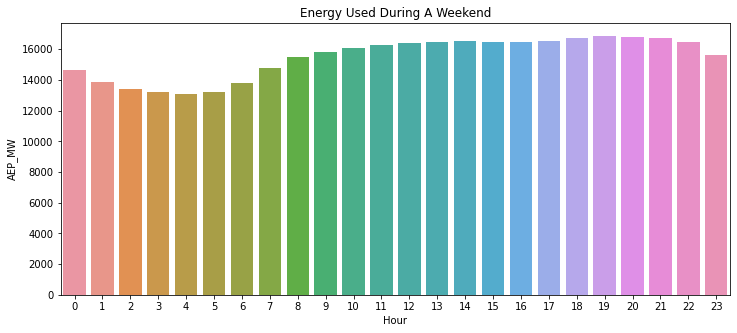

In [ ]:
Aug192017 = AEP.loc[(AEP['Day'] == 19) & (AEP['Year'] == 2017) & (AEP['Month'] == 8)]
Aug192017_agg = AEP.groupby('Hour')['AEP_MW'].mean().reset_index()
fix,ax=plt.subplots(figsize=(12,5))
c = sns.barplot(data=May112017_agg, x='Hour', y='AEP_MW')
plt.title('Energy Used During A Weekend')
plt.show()

In [ ]:
Aug192017

,Time_of_Year,AEP_MW,Month,Day,Year,Hour
110595,2017-08-19 01:00:00,13355.0,8,19,2017,1
110596,2017-08-19 02:00:00,12667.0,8,19,2017,2
110597,2017-08-19 03:00:00,12149.0,8,19,2017,3
110598,2017-08-19 04:00:00,11769.0,8,19,2017,4
110599,2017-08-19 05:00:00,11612.0,8,19,2017,5
110600,2017-08-19 06:00:00,11721.0,8,19,2017,6
110601,2017-08-19 07:00:00,11989.0,8,19,2017,7
110602,2017-08-19 08:00:00,12133.0,8,19,2017,8
110603,2017-08-19 09:00:00,13071.0,8,19,2017,9
110604,2017-08-19 10:00:00,14042.0,8,19,2017,10


In [ ]:
Dec252017

,Time_of_Year,AEP_MW,Month,Day,Year,Hour
107522,2017-12-25 01:00:00,13699.0,12,25,2017,1
107523,2017-12-25 02:00:00,13613.0,12,25,2017,2
107524,2017-12-25 03:00:00,13633.0,12,25,2017,3
107525,2017-12-25 04:00:00,13806.0,12,25,2017,4
107526,2017-12-25 05:00:00,14055.0,12,25,2017,5
107527,2017-12-25 06:00:00,14387.0,12,25,2017,6
107528,2017-12-25 07:00:00,14910.0,12,25,2017,7
107529,2017-12-25 08:00:00,15521.0,12,25,2017,8
107530,2017-12-25 09:00:00,15892.0,12,25,2017,9
107531,2017-12-25 10:00:00,16041.0,12,25,2017,10


In [ ]:
round(AEP.groupby('Year')['AEP_MW'].mean().mean(),0)

15478.0

In [ ]:
HPU = AEP.loc[(AEP['AEP_MW'] > 15478)] 

In [ ]:
HPUSorted = HPU.sort_values('Year')
HPUSorted 

,Time_of_Year,AEP_MW,Month,Day,Year,Hour
31,2004-12-30 08:00:00,15771.0,12,30,2004,8
1065,2004-11-17 10:00:00,16345.0,11,17,2004,10
1066,2004-11-17 11:00:00,16251.0,11,17,2004,11
1067,2004-11-17 12:00:00,16072.0,11,17,2004,12
1068,2004-11-17 13:00:00,15924.0,11,17,2004,13
...,...,...,...,...,...,...
117547,2018-06-05 18:00:00,15540.0,6,5,2018,18
117567,2018-06-04 14:00:00,15806.0,6,4,2018,14
117568,2018-06-04 15:00:00,16075.0,6,4,2018,15
117503,2018-06-07 22:00:00,16332.0,6,7,2018,22


In [ ]:
HPU['Year'].value_counts()

2007    5838
2008    5802
2006    4733
2005    4640
2010    4604
2011    4531
2012    3877
2009    3803
2013    3794
2014    3636
2015    3139
2016    3068
2017    2644
2018    2182
2004    1006
Name: Year, dtype: int64

In [ ]:
AEP.groupby('Year')['AEP_MW'].mean()

Year
2004    15176.724388
2005    15842.990865
2006    15737.224252
2007    16645.519297
2008    16536.655659
2009    15254.111669
2010    16008.619504
2011    15815.389472
2012    15352.940667
2013    15198.211578
2014    15169.078890
2015    14868.922603
2016    14784.225979
2017    14483.738356
2018    15290.612734
Name: AEP_MW, dtype: float64

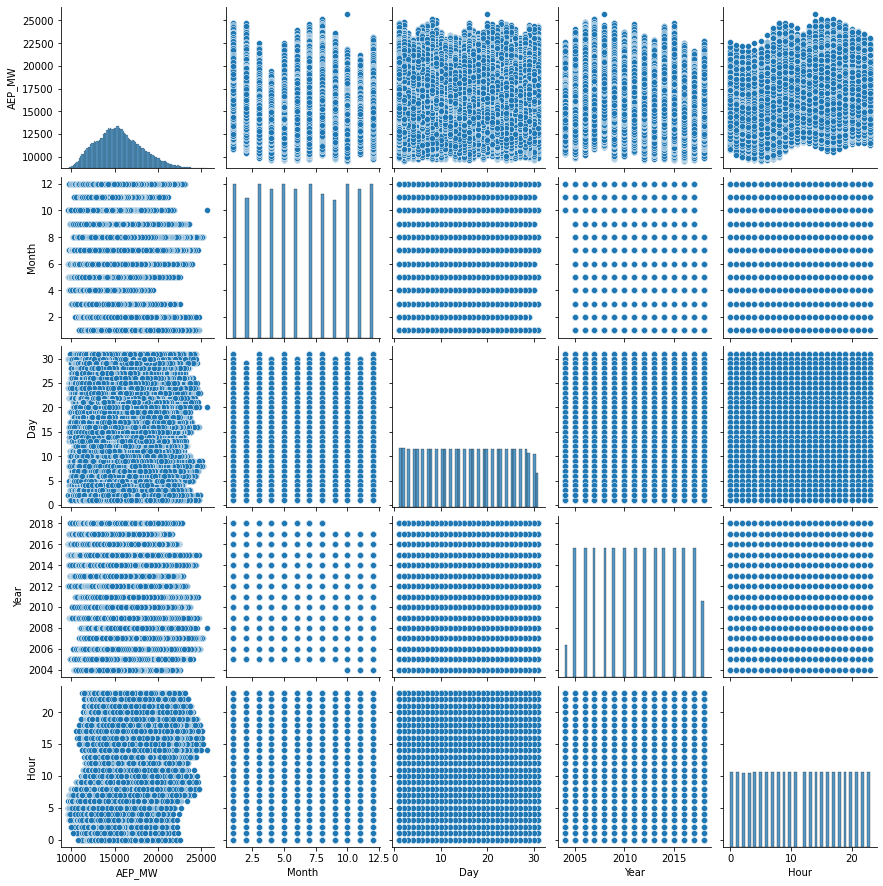

In [ ]:
sns.pairplot(AEP)